<a href="https://colab.research.google.com/github/brentwong-kiel1997/colab/blob/main/Brent's(Mingqian_Wang)_Portfolio_High_frequency_BTC_USD_Data_Analysis_with_5_minutes_intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brent's(Mingqian Wang) Portfolio-High frequency BTC-USD Data Analysis with 5 minutes intervals

---



**Financial Analyst & Data Scientist**

- [GitHub](https://github.com/brentwong-kiel1997)
- [LinkedIn](https://www.linkedin.com/in/mingqianwangbrent987614198/)
- [Personal Website](https://sites.google.com/view/profile-brent-mingqian-wang/)

In [ ]:
! pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.7 MB/s eta 0:00:00


## High frequency BTC-USD Data Analysis with 5 minutes intervals

**Objective:** Perform a detailed analysis of the BTC-USD trading pair.

**Tools Used:** Python, Plotly, yfinance, NumPy, Pandas.


### 1. Graphical Interpretation and Insights

- **Price Trends:** The BTC-USD prices showed a strong uptrend, indicating bullish market sentiment.
- **Trading Volume:** Higher trading volumes were observed during significant price changes, suggesting active market participation.
- **Logarithmic Returns:** The log returns indicate periods of high volatility, particularly during major market events.
- **Daily Volatility:** The daily volatility reveals increased market risk during certain periods.
- **Normalized Log Returns:** The normalized log returns suggest that the market was relatively efficient during this period.
"""

In [ ]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

def create_btc_usd_chart(tickers='BTC-USD',
                         interval='5m',
                         period='1mo'):
    # Fetch data at 5-minute intervals
    data = yf.download(tickers=tickers,
                       interval=interval,
                       period=period)

    # Calculate the logarithmic returns from the closing prices
    data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

    # Calculate daily log return and daily volatility
    daily_log_return = data['Log_Return'].resample('D').sum()
    daily_volatility = data['Log_Return'].pow(2).resample(
        'D').sum()  # Daily volatility as the sum of squared log returns
    normalized_log_return = daily_log_return / np.sqrt(daily_volatility)

    data = data.dropna()

    # Create a subplot with 6 rows and 1 column, sharing y-axes for all plots
    fig = make_subplots(rows=6, cols=1, shared_yaxes=True, vertical_spacing=0.08, subplot_titles=(
    'BTC-USD Price', 'Trading Volume', 'Logarithmic Returns', 'Daily Log Return', 'Daily Volatility',
    'Normalized Daily Log Return'))

    # Candlestick chart for the BTC-USD prices
    price_chart = go.Candlestick(x=data.index, open=data['Open'], high=data['High'], low=data['Low'],
                                 close=data['Close'], increasing_line_color='#00CC96', decreasing_line_color='#FF4136')
    fig.add_trace(price_chart, row=1, col=1)

    # Bar chart for trading volume
    volume_chart = go.Scatter(x=data.index, y=data['Volume'], mode='lines', name='Volume', line=dict(color='white'))
    fig.add_trace(volume_chart, row=2, col=1)

    # Line chart for logarithmic returns
    log_return_chart = go.Scatter(x=data.index, y=data['Log_Return'], mode='lines', name='Log Return',
                                  line=dict(color='#d62728'))
    fig.add_trace(log_return_chart, row=3, col=1)

    # Line chart for daily log return
    daily_log_return_chart = go.Scatter(x=daily_log_return.index, y=daily_log_return, mode='lines',
                                        name='Daily Log Return', line=dict(color='#2ca02c'))
    fig.add_trace(daily_log_return_chart, row=4, col=1)

    # Line chart for daily volatility
    daily_volatility_chart = go.Scatter(x=daily_volatility.index, y=daily_volatility, mode='lines',
                                        name='Daily Volatility', line=dict(color='#ff7f0e'))
    fig.add_trace(daily_volatility_chart, row=5, col=1)

    # Line chart for normalized log return
    normalized_log_return_chart = go.Scatter(x=normalized_log_return.index, y=normalized_log_return, mode='lines',
                                             name='Normalized Daily Log Return', line=dict(color='#9467bd'))
    fig.add_trace(normalized_log_return_chart, row=6, col=1)


    # Update the layout for a dark background
    fig.update_layout(template="plotly_dark", height=1200, title='BTC-USD Analysis', title_x=0.5)
    fig.update_yaxes(title_text='Price (USD)', row=1, col=1)
    fig.update_yaxes(title_text='Volume', row=2, col=1)# , type='log')
    fig.update_yaxes(title_text='Log Return', row=3, col=1)
    fig.update_yaxes(title_text='Daily Log Return', row=4, col=1)
    fig.update_yaxes(title_text='Daily Volatility', row=5, col=1)
    fig.update_yaxes(title_text='Normalized Daily Log Return', row=6, col=1)


    for i, y_data in enumerate([data['Close'], data['Volume'], data['Log_Return'], daily_log_return, daily_volatility,
                                normalized_log_return], start=1):
        y_min = y_data.min()
        y_max = y_data.max()
        margin = 0.1
        y_range = y_max - y_min
        y_lower_limit = y_min - margin * y_range
        y_upper_limit = y_max + margin * y_range
        fig.update_yaxes(range=[y_lower_limit, y_upper_limit], row=i, col=1)

    # Hide the rangeslider
    fig.update_layout(xaxis_rangeslider_visible=False)

    # Add x-axis title beneath each subplot
    for i, title in enumerate(('BTC-USD Price', 'Trading Volume', 'Logarithmic Returns', 'Daily Log Return',
                               'Daily Volatility', 'Normalized Daily Log Return'), start=1):
        fig.update_xaxes(title_text='Time', row=i, col=1)

    # Create a shared x-axis object
    shared_xaxis = dict(anchor="y", domain=[0, 1], matches='x')

    # Assign the shared x-axis to all subplots
    for i in range(1, 7):
        fig.update_xaxes(shared_xaxis, row=i, col=1)

    # Set x-axis range for all subplots
    x_range = [data.index.min(), data.index.max()]
    for i in range(1, 7):
        fig.update_xaxes(range=x_range, row=i, col=1)

    # Add annotations for date and time underneath each subplot
    for i, title in enumerate(('BTC-USD Price', 'Trading Volume', 'Logarithmic Returns', 'Daily Log Return',
                               'Daily Volatility', 'Normalized Daily Log Return'), start=1):
        fig.add_annotation(x=0.5, y=-0.1, xref="paper", yref="paper",
                           xanchor="center", yanchor="top",
                           text="Time: {} - {}".format(data.index[0], data.index[-1]),
                           showarrow=False,
                           font=dict(size=10),
                           row=i, col=1)

    return fig, data

fig, data = create_btc_usd_chart()
fig.show()

[*********************100%***********************]  1 of 1 completed


### 2. ARIMA model for fitting log return with 5 minutes interval

**Objective:** Extend the BTC-USD analysis by fitting the data into suitable time series models to forecast future prices and understand underlying patterns.

**Tools Used:** Python, statsmodels, Prophet, yfinance, NumPy, Pandas, Plotly.
"""

#### Parameter Tuning
**Determine Optimal Parameters**: Use model selection criteria to find the best parameters (p, d, q). You can use tools like auto_arima from the pmdarima library to automatically select the best parameters for your data.

In [ ]:
from pmdarima import auto_arima
log_return = data['Log_Return']


# Use auto_arima to find the best parameters
auto_model = auto_arima(log_return, seasonal=False, trace=True)
print(auto_model.summary())

# Extract the best parameters
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

# Print the best parameters
print(f"Best ARIMA Order: {best_order}")
print(f"Best Seasonal Order: {best_seasonal_order}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-55774.661, Time=3.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-84642.693, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-84645.033, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-84645.314, Time=0.52 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-84623.774, Time=1.50 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-84656.191, Time=3.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-84670.178, Time=2.71 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-84677.790, Time=2.67 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-84676.038, Time=4.59 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-84678.292, Time=4.85 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-84676.556, Time=3.51 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-84701.059, Time=3.60 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-84681.561, Time=3.20 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=-84698.207, Time=6.30 sec
 ARIM

#### fit the model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model with the best parameters
model = ARIMA(log_return, order=best_order)
arima_result = model.fit()

# Print model summary
print(arima_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                 8923
Model:                 ARIMA(4, 0, 5)   Log Likelihood               42377.577
Date:                Thu, 29 Aug 2024   AIC                         -84733.153
Time:                        13:07:48   BIC                         -84655.093
Sample:                             0   HQIC                        -84706.580
                               - 8923                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.681e-05   2.28e-05     -0.736      0.462   -6.15e-05    2.79e-05
ar.L1          0.4357      0.079      5.529      0.000       0.281       0.590
ar.L2         -0.8335      0.046    -18.024      0.0

##### ARIMA Model Summary

**General Information:**
- **Dep. Variable:** `Log_Return` — The variable being modeled.
- **No. Observations:** 8923 — The number of data points used in the model.
- **Model:** ARIMA(4, 0, 5) — The ARIMA model with parameters (p, d, q) as (4, 0, 5).
- **Log Likelihood:** 42377.577 — The log likelihood of the model, which measures the fit of the model to the data.
- **Date/Time:** Thu, 29 Aug 2024 / 13:07:48 — When the model was fitted.
- **Sample:** The full dataset of 8923 observations.

**Model Selection Criteria:**
- **AIC (Akaike Information Criterion):** -84733.153 — Lower values indicate a better fit when accounting for the number of parameters.
- **BIC (Bayesian Information Criterion):** -84655.093 — Similar to AIC but with a heavier penalty for additional parameters.
- **HQIC (Hannan-Quinn Information Criterion):** -84706.580 — Another criterion for selecting the best model, balancing fit and complexity.

**Coefficients:**
- **const:** -1.681e-05 — The constant term of the model. Its p-value (0.462) suggests it is not statistically significant.
- **ar.L1:** 0.4357 — Coefficient for the first autoregressive term with a high significance (p-value < 0.001).
- **ar.L2:** -0.8335 — Coefficient for the second autoregressive term, also highly significant.
- **ar.L3:** 0.1981 — Coefficient for the third autoregressive term, statistically significant.
- **ar.L4:** -0.3203 — Coefficient for the fourth autoregressive term, significant.
- **ma.L1:** -0.4554 — Coefficient for the first moving average term, highly significant.
- **ma.L2:** 0.8076 — Coefficient for the second moving average term, highly significant.
- **ma.L3:** -0.1478 — Coefficient for the third moving average term, statistically significant.
- **ma.L4:** 0.2320 — Coefficient for the fourth moving average term, significant.
- **ma.L5:** 0.0664 — Coefficient for the fifth moving average term, highly significant.
- **sigma2:** 4.389e-06 — The variance of the residuals, indicating the average squared deviation of the residuals from zero.

**Statistical Tests:**
- **Ljung-Box (L1) (Q):** 0.00 — Test statistic for autocorrelation in residuals at lag 1. The high p-value (0.98) indicates that residuals are not significantly autocorrelated.
- **Jarque-Bera (JB):** 270018.25 — Test statistic for the normality of residuals. The p-value (0.00) indicates that residuals significantly deviate from a normal distribution.
- **Heteroskedasticity (H):** 0.26 — Indicates the presence of heteroskedasticity (variability of residuals). The p-value (0.00) suggests significant heteroskedasticity.
- **Skew:** 0.26 — Measures the asymmetry of the residuals' distribution. Values close to 0 indicate a fairly symmetric distribution.
- **Kurtosis:** 29.94 — Measures the heaviness of tails in the residuals' distribution. High values indicate heavy tails compared to a normal distribution.

**Warnings:**
- **Covariance Matrix Calculation:** The covariance matrix was computed using the outer product of gradients, which is a technical detail related to the calculation of standard errors and confidence intervals.


#### Model Diagnostics


##### Check Residuals
**Plot Residuals**: Plot the residuals of the fitted model to visually inspect for any patterns or structure.

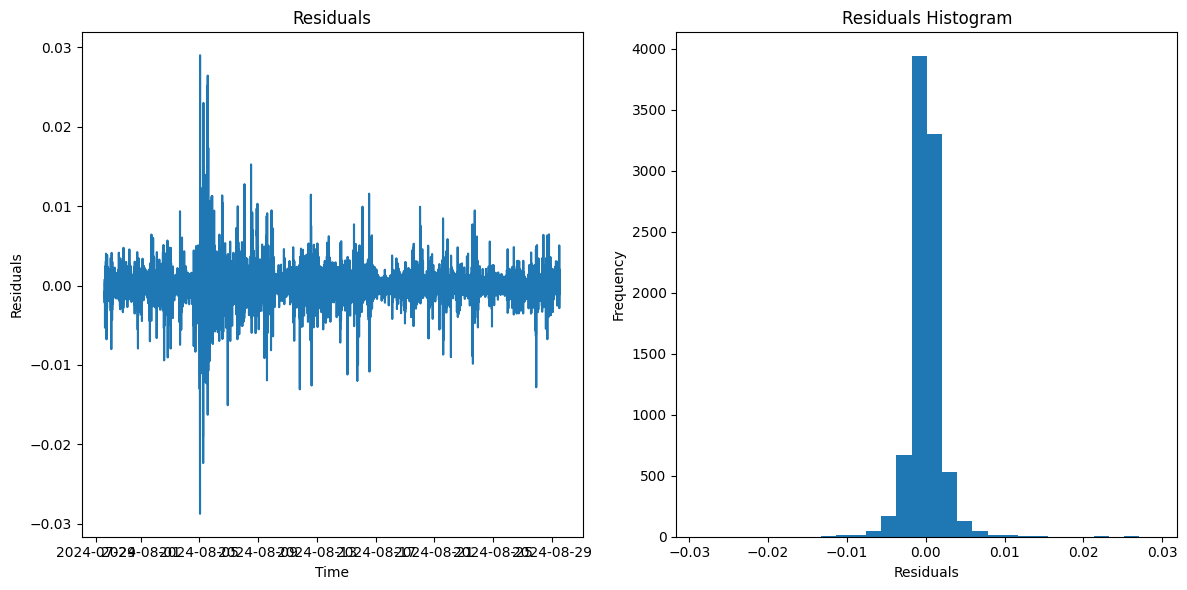

In [ ]:
import matplotlib.pyplot as plt

# Get residuals from the fitted model
residuals = arima_result.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')

# Plot residuals histogram
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Autocorrelation of Residuals**: Check for autocorrelation in the residuals using the autocorrelation function (ACF) plot.

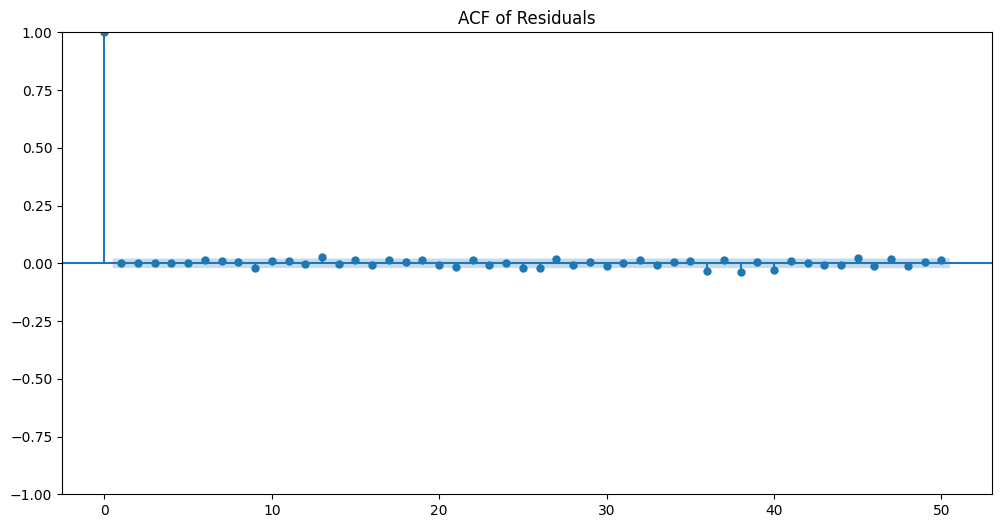

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF of the residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=50, ax=plt.gca())
plt.title('ACF of Residuals')
plt.show()


**Ljung-Box Test**: Perform the Ljung-Box test to check if there is significant autocorrelation in the residuals.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)


     lb_stat  lb_pvalue
10  7.178095   0.708532


**Normality of Residuals**: Use the Jarque-Bera test to check if the residuals are normally distributed.


In [ ]:
from scipy.stats import jarque_bera

# Perform Jarque-Bera test
jb_stat, jb_p_value = jarque_bera(residuals)
print(f"Jarque-Bera Statistic: {jb_stat}")
print(f"Jarque-Bera p-value: {jb_p_value}")


Jarque-Bera Statistic: 270017.03897995426
Jarque-Bera p-value: 0.0


### 3. Analyze the Value at Risk (VaR) and Expected Shortfall (ES) for 5 minute interval using 48 hours rolling windows

##### Prepare the Data


In [ ]:
data.index = data.index.tz_localize(None)  # Remove timezone info for consistency

#### Calculate Rolling VaR and ES

Define VaR and ES Calculation Function:

In [ ]:
# Define a function to calculate rolling VaR and ES
def calculate_var_es(log_returns, window=48*12, confidence_level=0.95):
    """
    Calculate rolling Value-at-Risk (VaR) and Expected Shortfall (ES).

    Parameters:
    log_returns (pd.Series): The log returns data.
    window (int): The rolling window size (number of data points).
    confidence_level (float): The confidence level for VaR and ES.

    Returns:
    pd.Series: Rolling VaR and ES.
    """
    # Calculate rolling VaR at the specified confidence level
    rolling_var = log_returns.rolling(window=window).apply(lambda x: np.quantile(x, 1-confidence_level), raw=False)

    # Calculate rolling Expected Shortfall (ES)
    def es_function(returns, var):
        """
        Calculate Expected Shortfall (ES) for returns below the VaR threshold.

        Parameters:
        returns (pd.Series): The returns within the rolling window.
        var (float): The VaR threshold.

        Returns:
        float: The ES value.
        """
        # Calculate ES only if there are returns below the VaR
        below_var = returns[returns <= var]
        return below_var.mean() if not below_var.empty else np.nan

    # Apply the ES function to each rolling window
    rolling_es = log_returns.rolling(window=window).apply(lambda x: es_function(pd.Series(x), np.quantile(x, 1-confidence_level)), raw=False)

    return rolling_var, rolling_es

 Compute VaR and ES for 48 hours:

In [ ]:
# Set the rolling window size (48 hours of 5-minute intervals)
window_size = 48 * 12

# Calculate VaR and ES
var_95, es_95 = calculate_var_es(data['Log_Return'], window=window_size, confidence_level=0.95)

# Add VaR and ES to the DataFrame
data['VaR_95'] = var_95
data['ES_95'] = es_95


<ipython-input-57-a183abd61844>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-a183abd61844>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Identify and Store Breaches

In [ ]:
# Identify breaches where the log return is less than the VaR
breaches = data[data['Log_Return'] < data['VaR_95']]

# Create a DataFrame to store breaches
breaches_df = breaches[['Log_Return', 'VaR_95', 'ES_95']].copy()
breaches_df['Breach'] = True

# Print breaches and save the results to a CSV file
print(breaches_df)
breaches_df.to_csv('breaches.csv')

                     Log_Return    VaR_95     ES_95  Breach
Datetime                                                   
2024-07-31 13:50:00   -0.002546 -0.002097 -0.003424    True
2024-07-31 14:10:00   -0.002183 -0.002097 -0.003314    True
2024-07-31 14:15:00   -0.002258 -0.002127 -0.003319    True
2024-07-31 14:25:00   -0.003497 -0.002127 -0.003333    True
2024-07-31 16:25:00   -0.002079 -0.001999 -0.002990    True
...                         ...       ...       ...     ...
2024-08-28 19:10:00   -0.004113 -0.002809 -0.004501    True
2024-08-28 20:00:00   -0.003027 -0.002880 -0.004506    True
2024-08-28 22:10:00   -0.003848 -0.002881 -0.004528    True
2024-08-29 01:15:00   -0.003417 -0.002881 -0.004529    True
2024-08-29 11:50:00   -0.002954 -0.002904 -0.004531    True

[470 rows x 4 columns]


#### plot the results


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 2 rows
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    subplot_titles=('Log Returns, VaR, ES, and Breaches', 'Trading Volume'),
    vertical_spacing=0.2
)

# Plot Log Returns
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Log_Return'],
    mode='lines',
    name='Log Return',
    line=dict(color='blue', width=2),
    opacity=0.6
), row=1, col=1)

# Plot VaR
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['VaR_95'],
    mode='lines',
    name='VaR 95%',
    line=dict(color='red', width=2, dash='dash')
), row=1, col=1)

# Highlight the area below VaR
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['VaR_95'],
    mode='lines',
    fill='tozeroy',
    fillcolor='rgba(255, 0, 0, 0.1)',
    line=dict(color='red', width=0),
    name='VaR Area'
), row=1, col=1)

# Plot Expected Shortfall (ES)
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['ES_95'],
    mode='lines',
    name='Expected Shortfall (ES) 95%',
    line=dict(color='green', width=2, dash='dash')
), row=1, col=1)

# Plot Breaches
fig.add_trace(go.Scatter(
    x=breaches.index,
    y=breaches['Log_Return'],
    mode='markers',
    name='Breaches',
    marker=dict(color='red', size=5, symbol='x')
), row=1, col=1)

# Plot Trading Volume
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Volume'],
    mode='lines',
    name='Trading Volume',
    line=dict(color='black', width=2)
), row=2, col=1)

# Update layout
fig.update_layout(
    title='Log Returns, VaR, ES, Breaches, and Trading Volume',
    xaxis_title='Datetime',
    yaxis_title='Value',
    legend_title='Legend',
    xaxis_rangeslider_visible=True
)

fig.show()
